In [111]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [112]:
#importing train dataset from local disk
train_data=pd.read_csv('zindi_train.csv')

In [113]:
train_data.sample(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
1037,FDE22,BABATUNJI010,FDE22_BABATUNJI010,9.695,Low Sugar,0.049499,Snack Foods,396.98,2005,NaN,Cluster 3,Grocery Store,798.96
1291,FDG33,BABATUNJI010,FDG33_BABATUNJI010,5.365,Normal Sugar,0.234733,Seafood,433.69,2005,NaN,Cluster 3,Grocery Store,429.44
1265,FDG16,BABATUNJI049,FDG16_BABATUNJI049,15.250,Low Sugar,0.089956,Frozen Foods,542.80,2006,Medium,Cluster 1,Supermarket Type1,8089.47
3429,FDW31,BABATUNJI018,FDW31_BABATUNJI018,11.350,Normal Sugar,0.043334,Fruits and Vegetables,502.69,2016,Medium,Cluster 3,Supermarket Type2,5474.54
1611,FDJ15,BABATUNJI017,FDJ15_BABATUNJI017,11.350,Normal Sugar,0.023454,Dairy,454.90,2014,NaN,Cluster 2,Supermarket Type1,4134.62


In [114]:
train_data.shape

(4990, 13)

In [115]:
train_data.drop(['Item_ID','Store_ID'],axis=1,inplace=True)

In [116]:
train_data.sample(5)

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
4726,NCS29_BABATUNJI019,NaN,Low Sugar,0.121765,Health and Hygiene,660.47,1992,Small,Cluster 1,Grocery Store,662.47
450,DRQ35_BABATUNJI017,9.30,Low Sugar,0.042531,Hard Drinks,313.85,2014,NaN,Cluster 2,Supermarket Type1,7120.73
4397,NCL30_BABATUNJI035,18.10,Low Sugar,0.048931,Household,318.33,2011,Small,Cluster 2,Supermarket Type1,2876.26
1591,FDJ04_BABATUNJI046,18.00,Low Sugar,0.124452,Frozen Foods,296.28,2004,Small,Cluster 1,Supermarket Type1,3259.09
1410,FDH34_BABATUNJI049,8.63,Low Sugar,0.031144,Snack Foods,459.90,2006,Medium,Cluster 1,Supermarket Type1,13467.47


In [117]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_Store_ID        4990 non-null   object 
 1   Item_Weight          4188 non-null   float64
 2   Item_Sugar_Content   4990 non-null   object 
 3   Item_Visibility      4990 non-null   float64
 4   Item_Type            4990 non-null   object 
 5   Item_Price           4990 non-null   float64
 6   Store_Start_Year     4990 non-null   int64  
 7   Store_Size           3540 non-null   object 
 8   Store_Location_Type  4990 non-null   object 
 9   Store_Type           4990 non-null   object 
 10  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 429.0+ KB


In [118]:
#'Item_Weight' fill it with the mean,then try backward and forward filling methods ,then try filling with 0
#'Store_Size': fill with the top freq

In [119]:
train_data.describe(include='all')

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
count,4990,4188.000000,4990,4990.000000,4990,4990.000000,4990.000000,3540,4990,4990,4990.000000
unique,4990,NaN,3,NaN,16,NaN,NaN,3,3,4,NaN
top,FDI50_BABATUNJI027,NaN,Low Sugar,NaN,Snack Foods,NaN,NaN,Medium,Cluster 3,Supermarket Type1,NaN
freq,1,NaN,3039,NaN,758,NaN,NaN,1582,1940,3304,NaN
mean,NaN,12.908838,NaN,0.066916,NaN,391.803796,2004.783567,NaN,NaN,NaN,6103.520164
std,NaN,4.703256,NaN,0.053058,NaN,119.378259,8.283151,NaN,NaN,NaN,4447.333835
min,NaN,4.555000,NaN,0.000000,NaN,78.730000,1992.000000,NaN,NaN,NaN,83.230000
25%,NaN,8.767500,NaN,0.027273,NaN,307.890000,1994.000000,NaN,NaN,NaN,2757.660000
50%,NaN,12.600000,NaN,0.053564,NaN,393.860000,2006.000000,NaN,NaN,NaN,5374.675000
75%,NaN,17.100000,NaN,0.095358,NaN,465.067500,2011.000000,NaN,NaN,NaN,8522.240000


##### checking and filling missing values 

In [120]:
train_data.isnull().sum()

Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [121]:
#filling missing values
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)

In [122]:
#replace missing values in 'Store_Size' with most freq value in the column
train_data.Store_Size.replace({np.nan:'Medium'},inplace=True)

In [123]:
train_data.isnull().sum()

Item_Store_ID          0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
Item_Store_Returns     0
dtype: int64

In [124]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_Store_ID        4990 non-null   object 
 1   Item_Weight          4990 non-null   float64
 2   Item_Sugar_Content   4990 non-null   object 
 3   Item_Visibility      4990 non-null   float64
 4   Item_Type            4990 non-null   object 
 5   Item_Price           4990 non-null   float64
 6   Store_Start_Year     4990 non-null   int64  
 7   Store_Size           4990 non-null   object 
 8   Store_Location_Type  4990 non-null   object 
 9   Store_Type           4990 non-null   object 
 10  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 429.0+ KB


###### Handling the Catgeorical variables in the dataset

In [125]:
train_data.Store_Location_Type.value_counts()
#this feature would be one hot encoded as values are nominal in nature

Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Store_Location_Type, dtype: int64

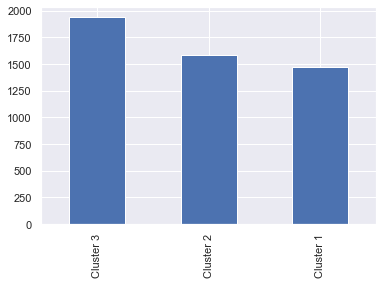

In [126]:
train_data.Store_Location_Type.value_counts().plot.bar()

In [127]:
train_data.Store_Type.value_counts()
#this feature would be one hot encoded as values are nominal in nature

Supermarket Type1    3304
Grocery Store         724
Supermarket Type2     500
Supermarket Type3     462
Name: Store_Type, dtype: int64

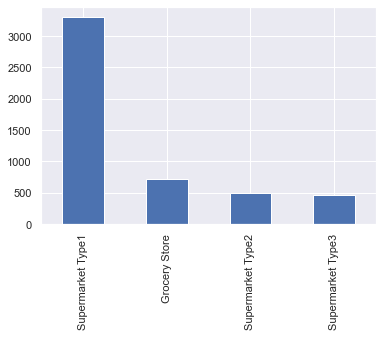

In [128]:
train_data.Store_Type.value_counts().plot.bar()

In [129]:
train_data.Store_Size.value_counts()
#Label encoding would be ideal for this feature , as the feature contains ordinal values
#Small-0
#Medium-1
#High-2

Medium    3032
Small     1364
High       594
Name: Store_Size, dtype: int64

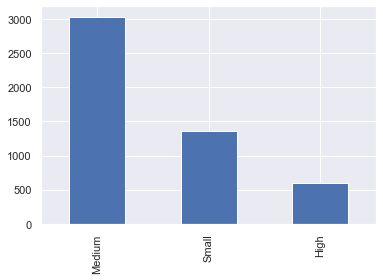

In [130]:
train_data.Store_Size.value_counts().plot.bar()

In [131]:
#Label encoding the store_size feature
train_data.Store_Size.replace({'Small':1,
                        'Medium':2,
                        'High':3},inplace=True)

In [132]:
train_data.Item_Sugar_Content.value_counts()
#ideal to carryout Label encoding since there is an intrinsic ranking of the values,
#i.e normal Sugar - 3     
#low Sugar - 2    
#Ultra Low Sugar - 1

Low Sugar          3039
Normal Sugar       1773
Ultra Low Sugar     178
Name: Item_Sugar_Content, dtype: int64

In [133]:
#label encoding the Item_Sugar_Content feature
train_data.Item_Sugar_Content.replace({'Ultra Low Sugar':1,
                                 'Low Sugar':2,
                                'Normal Sugar':3},inplace=True)

In [134]:
train_data.sample(5)

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
4020,NCA05_BABATUNJI046,20.750000,2,0.025131,Health and Hygiene,375.18,2004,1,Cluster 1,Supermarket Type1,6310.12
3698,FDY04_BABATUNJI017,17.700000,3,0.042717,Frozen Foods,408.05,2014,2,Cluster 2,Supermarket Type1,4485.83
2895,FDT08_BABATUNJI035,13.650000,2,0.049209,Fruits and Vegetables,375.01,2011,1,Cluster 2,Supermarket Type1,5617.69
2577,FDR16_BABATUNJI018,5.845000,3,0.105446,Frozen Foods,536.05,2016,2,Cluster 3,Supermarket Type2,3740.13
530,FDA26_BABATUNJI027,12.908838,3,0.073562,Dairy,544.12,1992,2,Cluster 3,Supermarket Type3,8214.31


In [135]:
train_data.Item_Type.value_counts()
#carrying out a one hot encoding on this feature would lead to a sparse dataset

Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Item_Type, dtype: int64

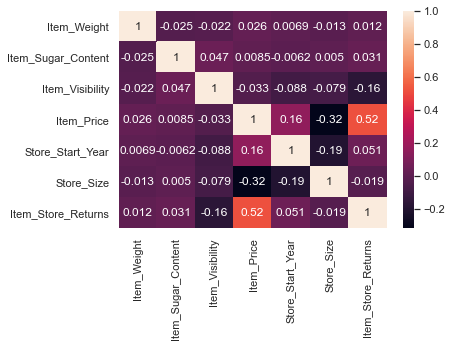

In [136]:
sns.heatmap(train_data.iloc[:,1:].corr(),annot=True)

In [137]:
enc_store_location_type=pd.get_dummies(train_data.Store_Location_Type)

In [138]:
train_data=pd.concat((train_data,enc_store_location_type),axis=1)

In [139]:
train_data.drop('Store_Location_Type',axis=1,inplace=True)

In [140]:
enc_Store_Type=pd.get_dummies(train_data.Store_Type)

In [141]:
train_data.drop('Store_Type',axis=1,inplace=True)

In [142]:
train_data=pd.concat((train_data,enc_Store_Type),axis=1)

In [143]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Store_ID       4990 non-null   object 
 1   Item_Weight         4990 non-null   float64
 2   Item_Sugar_Content  4990 non-null   int64  
 3   Item_Visibility     4990 non-null   float64
 4   Item_Type           4990 non-null   object 
 5   Item_Price          4990 non-null   float64
 6   Store_Start_Year    4990 non-null   int64  
 7   Store_Size          4990 non-null   int64  
 8   Item_Store_Returns  4990 non-null   float64
 9   Cluster 1           4990 non-null   uint8  
 10  Cluster 2           4990 non-null   uint8  
 11  Cluster 3           4990 non-null   uint8  
 12  Grocery Store       4990 non-null   uint8  
 13  Supermarket Type1   4990 non-null   uint8  
 14  Supermarket Type2   4990 non-null   uint8  
 15  Supermarket Type3   4990 non-null   uint8  
dtypes: flo

In [144]:
train_data=train_data.astype({'Cluster 1':'float64',
             'Cluster 2':'float64',
             'Cluster 3':'float64',
             'Grocery Store':'float64',
             'Supermarket Type1':'float64',
             'Supermarket Type2':'float64',
             'Supermarket Type3':'float64'})

In [146]:
enc_Item_Type=pd.get_dummies(train_data.Item_Type)
train_data.drop('Item_Type',axis=1,inplace=True)

In [147]:
train_data=pd.concat((train_data,enc_Item_Type),axis=1)

In [148]:
train_data.head()

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Price,Store_Start_Year,Store_Size,Item_Store_Returns,Cluster 1,Cluster 2,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,DRA12_BABATUNJI010,11.6,2,0.068535,357.54,2005,2,709.08,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,DRA12_BABATUNJI013,11.6,2,0.040912,355.79,1994,3,6381.69,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,DRA12_BABATUNJI017,11.6,2,0.041178,350.79,2014,2,6381.69,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,DRA12_BABATUNJI018,11.6,2,0.041113,355.04,2016,2,2127.23,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,DRA12_BABATUNJI035,11.6,1,0.000000,354.79,2011,1,2481.77,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [149]:
cols=train_data.columns

In [150]:
new_columns=[]
for i in cols:
    new_columns.append(i.replace(' ','_'))
train_data.columns=new_columns

In [151]:
train_data.to_csv('clean_zindi_train_.csv')

#### performing similar Data cleaning operation on the test dataset

In [152]:
test_data=pd.read_csv('zindi_test.csv')

In [153]:
test_data.sample(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
1987,FDR43,BABATUNJI018,FDR43_BABATUNJI018,18.200,Low Sugar,0.162147,Fruits and Vegetables,94.30,2016,Medium,Cluster 3,Supermarket Type2
2977,NCD19,BABATUNJI017,NCD19_BABATUNJI017,8.930,Low Sugar,0.013254,Household,141.15,2014,NaN,Cluster 2,Supermarket Type1
3092,NCI43,BABATUNJI018,NCI43_BABATUNJI018,19.850,Low Sugar,0.026074,Household,121.59,2016,Medium,Cluster 3,Supermarket Type2
1487,FDM28,BABATUNJI010,FDM28_BABATUNJI010,15.700,Low Sugar,0.075662,Frozen Foods,453.42,2005,NaN,Cluster 3,Grocery Store
681,FDD28,BABATUNJI049,FDD28_BABATUNJI049,10.695,Low Sugar,0.053380,Frozen Foods,141.98,2006,Medium,Cluster 1,Supermarket Type1


In [154]:
test_data.drop(['Item_ID','Store_ID'],axis=1,inplace=True)

In [155]:
test_data.Item_Weight.fillna(test_data.Item_Weight.mean(),inplace=True)

In [156]:
test_data.Store_Size.replace({np.nan:'Medium'},inplace=True)

In [157]:
#Label encoding the store_size feature
test_data.Store_Size.replace({'Small':1,
                        'Medium':2,
                        'High':3},inplace=True)

In [158]:
#label encoding the Item_Sugar_Content feature
test_data.Item_Sugar_Content.replace({'Ultra Low Sugar':1,
                                 'Low Sugar':2,
                                'Normal Sugar':3},inplace=True)

In [159]:
enc_store_location_type=pd.get_dummies(test_data.Store_Location_Type)

In [160]:
test_data=pd.concat((test_data,enc_store_location_type),axis=1)

In [161]:
test_data.drop('Store_Location_Type',axis=1,inplace=True)

In [162]:
enc_Store_Type=pd.get_dummies(test_data.Store_Type)

In [163]:
test_data.drop('Store_Type',axis=1,inplace=True)

In [164]:
test_data=pd.concat((test_data,enc_Store_Type),axis=1)

In [165]:
test_data=test_data.astype({'Cluster 1':'float64',
             'Cluster 2':'float64',
             'Cluster 3':'float64',
             'Grocery Store':'float64',
             'Supermarket Type1':'float64',
             'Supermarket Type2':'float64',
             'Supermarket Type3':'float64'})

In [166]:
enc_Item_Type=pd.get_dummies(test_data.Item_Type)
test_data.drop('Item_Type',axis=1,inplace=True)

In [167]:
test_data=pd.concat((test_data,enc_Item_Type),axis=1)

In [168]:
cols=test_data.columns

In [169]:
new_columns=[]
for i in cols:
    new_columns.append(i.replace(' ','_'))
test_data.columns=new_columns

In [170]:
test_data.to_csv('clean_zindi_test_.csv')

##### Model building

In [171]:
data=pd.read_csv('clean_zindi_train.csv')

In [172]:
X=data.drop('Item_Store_ID',axis=1)
y=data.Item_Store_Returns

In [173]:
#selecting features
features=['Item_Visibility','Item_Price','Cluster_1','Cluster_2','Grocery_Store','Supermarket_Type1','Supermarket_Type3']

In [174]:
X=X.loc[:,features]

In [175]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
scale=StandardScaler().fit(X)

In [176]:
X=scale.transform(X)

In [177]:
poly=PolynomialFeatures().fit(X)

In [178]:
X=poly.transform(X)

In [179]:
from sklearn.model_selection import train_test_split as tts
x_train,x_val,y_train,y_val=tts(X,y,test_size=0.3,random_state=1)

In [180]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [181]:
lr=LinearRegression()

In [182]:
ridge=Ridge(alpha=100)

In [183]:
lr.fit(x_train,y_train)

LinearRegression()

In [184]:
lr.score(x_train,y_train)

0.5764647490037925

In [185]:
lr.score(x_val,y_val)

0.5657883514174351

In [186]:
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [187]:
ridge.score(x_train,y_train)

0.5761263921699549

In [188]:
ridge.score(x_val,y_val)

0.5662898826454437

In [189]:
#using Lasso 
lasso=Lasso(alpha=20,max_iter=100000)
lasso.fit(x_train,y_train)

Lasso(alpha=20, max_iter=100000)

In [190]:
lasso.score(x_train,y_train)

0.5760016101371028

In [191]:
lasso.score(x_val,y_val)

0.5664122912881655

In [192]:
from sklearn.metrics import mean_squared_error as mse

In [193]:
mse(y_val,lasso.predict(x_val))**0.5

2918.0187700836377

In [194]:
mse(y_val,lr.predict(x_val))**0.5

2920.1175539001033

###### lasso performed better over ridge and the simple linear regression model

In [201]:
#loading the test dataset

In [202]:
test=pd.read_csv('clean_zindi_test.csv')

In [203]:
test_data=pd.read_csv('zindi_test.csv') #original dataset needed for submission

In [204]:
test.drop(['Unnamed: 0','Item_Store_ID'],axis=1,inplace=True)

In [205]:
x_test=test.loc[:,features]

In [206]:
x_test=scale.transform(x_test)
x_test=poly.transform(x_test)

In [208]:
#using the Lasso model for test prediction
predictions=lasso.predict(x_test)

##### making submission 

In [209]:
submit=pd.DataFrame({'Item_Store_ID':test_data.Item_Store_ID,
                   'Item_Store_Returns':predictions})

In [210]:
submit.to_csv('my_submission.csv',index=False)

**Further improvements:**

Better feature engineering and selection.

ensembling techniques.